<h1 align="center"> AB Bank Credit Card Launch</h1>

Objective: Analyze customers' transactions and credit profiles to figure out a target group for the launch of AB bank credit card

In [118]:
 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.api as sm
from scipy import stats as st
from matplotlib.patches import Patch
import warnings
warnings.filterwarnings("ignore")

#### Reading data from CSV

In [119]:
df_cust = pd.read_csv('customers.csv')
df_cs = pd.read_csv('credit_profiles.csv')
df_trans = pd.read_csv('transactions.csv')


<h2 style="color:blue" align="center">EDA Customer Table</h2>


In [120]:
df_cust.sample(5)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
746,747,Kunal Pawar,Male,48,Suburb,Consultant,115883.0,Married
156,157,Yash Pande,Male,27,City,Freelancer,215049.0,Married
449,450,Anika Rathod,Female,24,Suburb,Fullstack Developer,NaN,Married
83,84,Advik Sethi,Male,43,Rural,Consultant,15804.0,Married
878,879,Rudra Ganguly,Male,49,Suburb,Business Owner,192207.0,Single


#### EDA - Checking Null , Duplicates , Any invalid Data , Outliers

In [121]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [122]:
df_cust.occupation.nunique()

7

In [123]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

#### Handling Null values in Annual Income by replacing it with median of corresponding occupation

In [124]:
df_cust[df_cust.annual_income.isnull()].sample(5)


,cust_id,name,gender,age,location,occupation,annual_income,marital_status
461,462,Kunal Nair,Male,33,City,Data Scientist,NaN,Married
474,475,Neha Verma,Female,28,City,Data Scientist,NaN,Single
998,999,Amara Rathore,Female,47,City,Business Owner,NaN,Married
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
817,818,Akshay Mehrotra,Male,47,City,Consultant,NaN,Single


In [125]:
occupation_wise_median = df_cust.groupby('occupation')['annual_income'].median()
occupation_wise_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [126]:
occupation_wise_median['Artist']

45794.0

In [127]:
df_cust['annual_income']=df_cust.apply(
lambda row: occupation_wise_median[row['occupation']] if pd.isnull(row['annual_income']) else row['annual_income'],
    axis=1
)

In [128]:
df_cust.iloc[[788,804]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
788,789,Vihaan Singhal,Male,20,City,Fullstack Developer,76774.0,Single
804,805,Aarushi Dhawan,Female,32,City,Business Owner,292375.0,Married


In [129]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

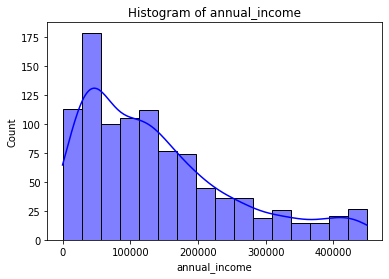

In [130]:
sns.histplot(df_cust['annual_income'], kde=True, color='blue', label='Data')
plt.title('Histogram of annual_income')
plt.show()

#### Checking duplicates

In [131]:
df_cust[df_cust.duplicated(keep=False)]


,cust_id,name,gender,age,location,occupation,annual_income,marital_status


#### Checking Income outliers using +/- 3 std dev 

In [132]:
lower_limit = df_cust['annual_income'].mean() - 3*df_cust['annual_income'].std()
upper_limit = df_cust['annual_income'].mean() + 3*df_cust['annual_income'].std()

lower_limit, upper_limit

(-193991.4604300989, 471824.9914300989)

In [133]:
df_cust['annual_income'].min(), df_cust['annual_income'].max()

(2.0, 449346.0)

In [134]:
df_cust[df_cust['annual_income']<150]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [135]:
for index,row in df_cust.iterrows():
    if row['annual_income']<150:
        occupation = df_cust.at[index,'occupation']
        df_cust.at[index,'annual_income']=occupation_wise_median[occupation]
       

In [136]:
df_cust[df_cust['annual_income']<150]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [137]:
df_cust.iloc[[31,804]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,261191.5,Married
804,805,Aarushi Dhawan,Female,32,City,Business Owner,292375.0,Married


#### Handling Income outliers by not deleting but replacing with occupation wise median

In [138]:
avg_income_per_occupation  = df_cust.groupby("occupation")["annual_income"].mean()
avg_income_per_occupation 

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

[]

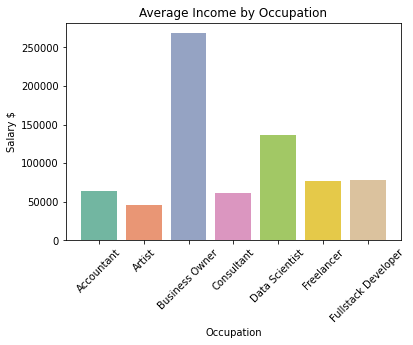

In [139]:
sns.barplot(x=avg_income_per_occupation.index ,y=avg_income_per_occupation.values,palette='Set2')

plt.xticks(rotation=45)
plt.title('Average Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Salary $')

plt.plot()

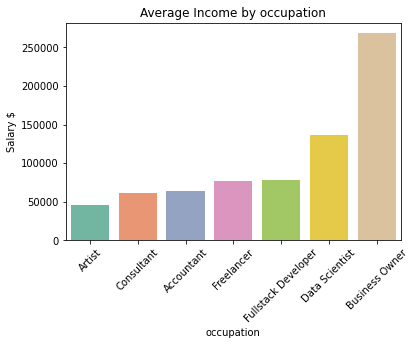

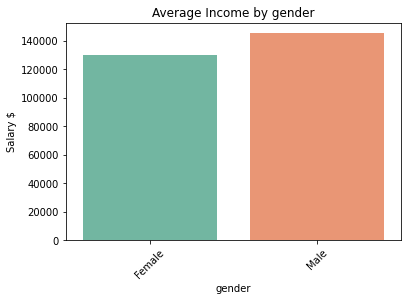

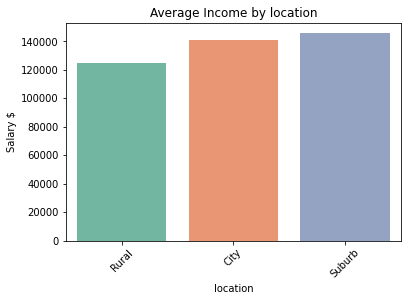

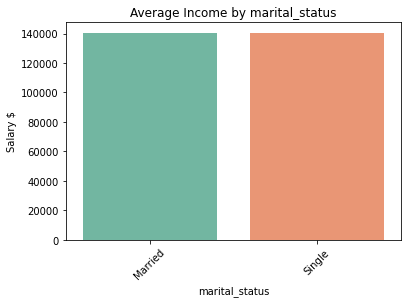

In [140]:

columns= ['occupation','gender','location','marital_status']

for col in columns:

    avg_income= df_cust.groupby(col)["annual_income"].mean().sort_values()

    sns.barplot(x=avg_income.index ,y=avg_income.values,palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f'Average Income by {col}')
    plt.xlabel(col)
    plt.ylabel('Salary $')
    
    plt.show()
    

#### Checking Age Column for outliers 

In [141]:
lower_limit = df_cust['age'].mean() - 3*df_cust['age'].std()
upper_limit = df_cust['age'].mean() + 3*df_cust['age'].std()

lower_limit, upper_limit

(-10.593464130550373, 83.40346413055038)

In [142]:
df_cust['age'].min(), df_cust['age'].max()

(1, 135)

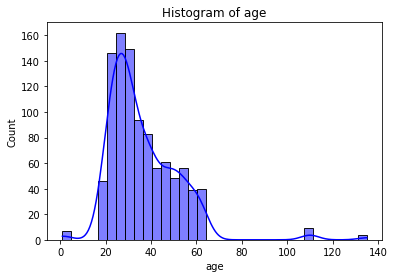

In [143]:
sns.histplot(df_cust['age'], kde=True, color='blue', label='Data',bins='auto')
plt.title('Histogram of age')
plt.show()

In [144]:
age_outliers= df_cust[(df_cust.age<=15) | (df_cust.age>=85)]   # invalid age group and checking outlier values
age_outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [145]:
median_age_occupation = df_cust.groupby('occupation')['age'].median()
median_age_occupation

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [146]:
for index, row in age_outliers.iterrows():
    df_cust.at[index,'age']=median_age_occupation[row['occupation']]

#### For our Business purpose we are interested in Age more than 15 and less than 85 so we check any values apart from that exist

In [147]:
df_cust[(df_cust.age<=15) | (df_cust.age>=85)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [148]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,35.541500,140483.548500
std,288.819436,12.276634,110463.002934
min,1.000000,18.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,44.250000,195514.250000
max,1000.000000,64.000000,449346.000000


In [149]:
df_cust.sample(5)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
708,709,Aditya Saxena,Male,29.0,City,Data Scientist,189830.0,Married
290,291,Priya Jain,Female,48.0,City,Consultant,71725.0,Married
890,891,Krishna Lalwani,Male,42.0,Suburb,Business Owner,202157.0,Married
813,814,Mihika Tiwari,Female,32.0,City,Data Scientist,171287.0,Married
951,952,Virat Shetty,Male,32.0,City,Data Scientist,49677.0,Married


#### Visualizing Age Column

In [150]:
# Define the bin edges and labels
bin_edges = [17, 25, 48, 65]  # Adjust as needed
bin_labels = ['18-25', '26-48', '49-65']

# Use the cut function to bin and label the age column
df_cust['age_group'] = pd.cut(df_cust['age'], bins=bin_edges, labels=bin_labels)

In [151]:
df_cust['age_group'].value_counts(normalize=True)*100

26-48    56.7
18-25    24.6
49-65    18.7
Name: age_group, dtype: float64

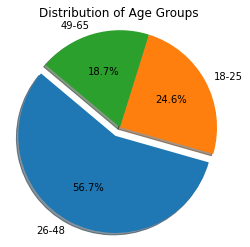

In [152]:
# Calculate the count of values in each age group
age_group_counts = df_cust['age_group'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    age_group_counts, 
    labels=age_group_counts.index, 
    explode=(0.1,0,0), 
    autopct='%1.1f%%', 
    shadow=True,
    startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Age Groups')
plt.show()

##### More than 50% of customer base are in in age group of 26 - 48 and ~26% are of age group 18 - 25

### Analyze Gender and Location Distribution

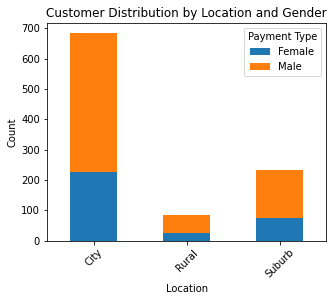

In [153]:
customer_location_gender = df_cust.groupby(['location', 'gender']).size().unstack(fill_value=0)

# Create a stacked bar chart to visualize the distribution of payment types for each occupation
customer_location_gender.plot(kind='bar', stacked=True, figsize=(5, 4))

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Customer Distribution by Location and Gender')

# Show the bar chart
plt.legend(title='Payment Type', bbox_to_anchor=(1, 1))  # Add a legend

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

<h2 style="color:blue" align="center">EDA Credit Score Table</h2>


In [154]:
df_cs.sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
479,480,791,0.886509,39600.0,4.0,60000.0
550,550,720,0.879308,18432.0,0.0,40000.0
268,269,489,0.664772,314.0,2.0,750.0


In [155]:
df_cs.shape

(1004, 6)

In [156]:
df_cust.shape

(1000, 9)

In [157]:
df_cs[df_cs['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [158]:
df_cs_clean = df_cs.drop_duplicates(subset='cust_id',keep='last')
df_cs_clean.shape

(1000, 6)

In [159]:
df_cs_clean.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [160]:
df_cs_clean['credit_limit'].unique()

array([40000.,  1250.,  1000.,   500.,   750.,    nan,  1500., 60000.,
       20000.])

In [161]:
df_cs_clean['credit_limit'].value_counts()

500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: credit_limit, dtype: int64

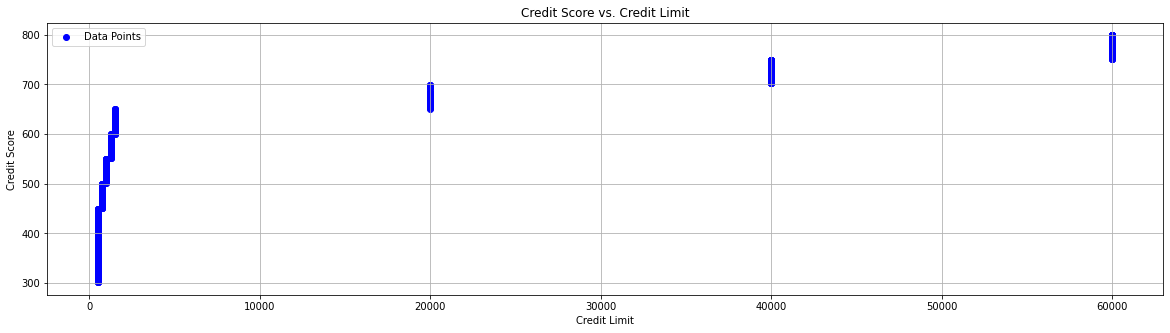

In [162]:
# Looking at scatter plot for credit score vs credit_limit again (after handling oultiers)
# Create a scatter plot
plt.figure(figsize=(20, 5))
plt.scatter(df_cs_clean['credit_limit'], df_cs_clean['credit_score'], c='blue', marker='o', label='Data Points')

# Customize the plot
plt.title('Credit Score vs. Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')

plt.grid(True)


# Show the plot
plt.legend()
plt.show()

In [163]:
# Define bin ranges
bin_ranges = [300, 450, 500, 550, 600, 650, 700, 750, 800]

# Create labels for the bins
bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_ranges, bin_ranges[1:])]

# Use pd.cut to assign data to bins
df_cs_clean['credit_score_range'] = pd.cut(df_cs_clean['credit_score'], bins=bin_ranges, labels=bin_labels, include_lowest=True, right=False)

In [164]:
df_cs_clean.sample(4)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
919,916,649,0.272317,276.0,2.0,1500.0,600-649
384,385,666,0.789690,13470.0,4.0,20000.0,650-699
722,719,613,0.562543,494.0,0.0,1500.0,600-649
138,139,504,0.356472,289.0,3.0,1000.0,500-549


In [165]:
df_cs_clean.groupby('credit_score_range')['credit_limit'].nunique()

credit_score_range
300-449    1
450-499    2
500-549    2
550-599    2
600-649    2
650-699    2
700-749    1
750-799    2
Name: credit_limit, dtype: int64

#### Here we can see some credit ranges have multiple values. So we can take mode of credit limit for that range and impute in NA Credit limit values


In [166]:
mode_df = df_cs_clean.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode().iloc[0]).reset_index()
mode_df

,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [167]:
df_cs_clean_1 = pd.merge(df_cs_clean, mode_df, on='credit_score_range', suffixes=('', '_mode'))
df_cs_clean_1.sample(5)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
302,874,535,0.312422,188.0,3.0,1000.0,500-549,1000.0
265,438,508,0.744992,536.0,1.0,1000.0,500-549,1000.0
151,135,594,0.130223,95.0,2.0,1250.0,550-599,1250.0
863,377,781,0.688244,27299.0,1.0,60000.0,750-799,60000.0
960,834,774,0.380430,13502.0,2.0,60000.0,750-799,60000.0


In [168]:
df_cs_clean_1[df_cs_clean_1.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
606,663,478,0.154754,84.0,0.0,NaN,450-499,750.0
921,656,785,0.387122,14866.0,1.0,NaN,750-799,60000.0
237,108,500,0.776230,448.0,2.0,NaN,500-549,1000.0


In [169]:
df_cs_clean_2 = df_cs_clean_1.copy()
df_cs_clean_2['credit_limit'].fillna(df_cs_clean_2['credit_limit_mode'], inplace=True)
df_cs_clean_2.shape

(1000, 8)

In [170]:
df_cs_clean_2.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
credit_limit_mode                 0
dtype: int64

In [171]:
df_cs_clean_2.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


Text(0.5, 1.0, 'Box plot for outstanding debt')

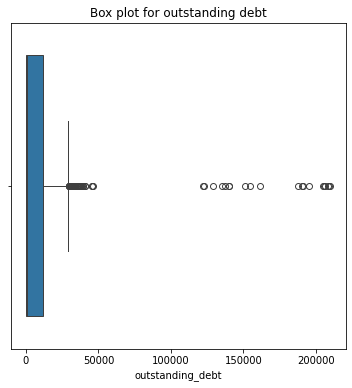

In [172]:
plt.figure(figsize=(6, 6))
sns.boxplot(x=df_cs_clean_2['outstanding_debt'])
plt.title('Box plot for outstanding debt')

In [173]:
df_cs_clean_2[df_cs_clean_2.outstanding_debt>df_cs_clean_2.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
6,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
12,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
35,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
41,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
101,726,737,0.136048,205404.0,4.0,40000.0,700-749,40000.0
142,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
363,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
406,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0
474,637,420,0.323984,140063.0,4.0,500.0,300-449,500.0
604,647,498,0.658087,128818.0,3.0,750.0,450-499,750.0


In [174]:
df_cs_clean_2.loc[df_cs_clean_2['outstanding_debt'] > df_cs_clean_2['credit_limit'], 'outstanding_debt']

6      122758.0
12     137058.0
35     154568.0
41     122402.0
101    205404.0
142    161644.0
363    187849.0
406    150860.0
474    140063.0
604    128818.0
609    140008.0
615    195004.0
684    205014.0
759    209901.0
788    190838.0
858    208898.0
877    206191.0
903    135112.0
930    190717.0
968    208406.0
Name: outstanding_debt, dtype: float64

In [175]:
df_cs_clean_2.loc[df_cs_clean_2['outstanding_debt'] > df_cs_clean_2['credit_limit'], 'outstanding_debt'] = df_cs_clean_2['credit_limit']

In [176]:
df_cs_clean_2[df_cs_clean_2.outstanding_debt>df_cs_clean_2.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


#### Here we can see outliers are removed

In [177]:
df_cs_clean_2.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,6850.084000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,10683.473561,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,541.500000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,10924.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,60000.000000,4.000000,60000.00000,60000.000000


In [178]:
df_merged = df_cust.merge(df_cs_clean_2, on='cust_id', how='inner')
df_merged.head(2)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0


In [179]:
numerical_cols = ['credit_score', 'credit_utilisation', 'outstanding_debt', 'credit_limit', 'annual_income','age']

correlation_matrix = df_merged[numerical_cols].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680654,0.847952,0.575751,0.444917
credit_utilisation,-0.070445,1.000000,0.192838,-0.080493,-0.086368,-0.027713
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.555661,0.444301
credit_limit,0.847952,-0.080493,0.810581,1.000000,0.684775,0.510993
annual_income,0.575751,-0.086368,0.555661,0.684775,1.000000,0.619037
age,0.444917,-0.027713,0.444301,0.510993,0.619037,1.000000


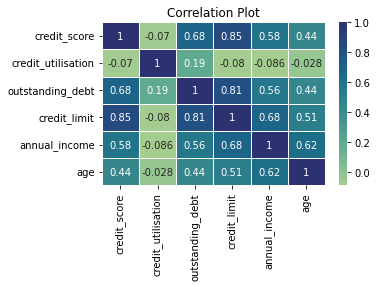

In [180]:
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=1)
plt.title('Correlation Plot')
plt.show()

<h1 style="color:blue" align="center">EDA Transactions Table<h1>

In [181]:
df_trans.sample(2)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
299175,299176,466,2023-05-29,48,Flipkart,Kitchen Appliances,Credit Card
31138,31139,510,2023-01-16,135,Shopify,Beauty & Personal Care,Credit Card


In [182]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [183]:
df_trans[df_trans.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


In [184]:
df_trans_2= df_trans.copy()



In [185]:
mode_platform = df_trans_2[df_trans_2['platform'].notnull()].groupby('cust_id')['platform'].agg(lambda x: x.mode()[0])

In [186]:
df_trans_2.loc[df_trans_2['cust_id'] == 58]


,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
184,185,58,2023-01-01,49,Amazon,Kitchen Appliances,Credit Card
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
4064,4065,58,2023-01-02,189,Cred,Garden & Outdoor,Debit Card
4454,4455,58,2023-01-03,32,Meesho,Fashion & Apparel,Credit Card
4726,4727,58,2023-01-03,22,Flipkart,Toys & Games,Gpay
...,...,...,...,...,...,...,...
495153,495154,58,2023-09-03,663,Amazon,Electronics,Gpay
495971,495972,58,2023-09-03,656,Flipkart,Electronics,Credit Card
496350,496351,58,2023-09-04,688,Amazon,Electronics,Debit Card
497693,497694,58,2023-09-04,142,Meesho,Kitchen Appliances,Credit Card


In [187]:
df_trans_2[df_trans_2['cust_id'] == 58]['platform'].value_counts()


Amazon      151
Flipkart    128
Alibaba      85
Meesho       60
Shopify      37
Cred         27
Ebay         12
Name: platform, dtype: int64

#### In above Nulls Table we see that Cust_id with 58 has NULL in platform . so we check its another transaction to find the most used platform and replace it with it as we have around 5000 rows which have NULL in platform so we cannot drop it

In [188]:
# Taking the first mode if multiple values
mode_platform = df_trans_2[df_trans_2['platform'].notnull()].groupby('cust_id')['platform'].agg(lambda x: x.mode()[0])  
mode_platform


cust_id
1       Amazon
2       Amazon
3       Amazon
4       Amazon
5       Amazon
         ...  
996     Amazon
997     Amazon
998     Amazon
999     Amazon
1000    Amazon
Name: platform, Length: 1000, dtype: object

In [189]:
df_trans_2['platform'] = df_trans_2.apply(
    lambda row: mode_platform[row['cust_id']] if pd.isnull(row['platform']) and row['cust_id'] in mode_platform else row['platform'],
    axis=1
)


In [190]:
df_trans_2[df_trans_2.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


In [191]:
df_trans_2.iloc[[355,418,912,499579]]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,Amazon,Electronics,Net Banking
418,419,383,2023-01-01,338,Amazon,Electronics,Credit Card
912,913,384,2023-01-01,85,Amazon,Fashion & Apparel,Phonepe
499579,499580,924,2023-09-05,31,Amazon,Fashion & Apparel,Gpay


#### So here we can see that maximum purchase by different customers in on Amazon . Lets validate it by checking the bar graph

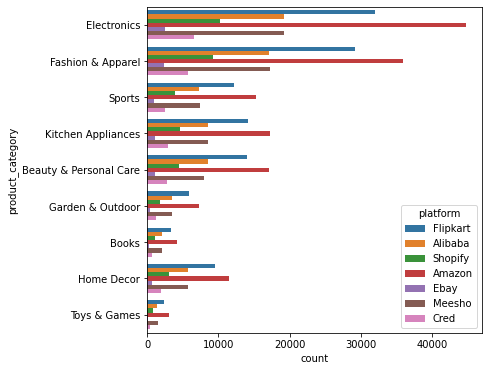

In [192]:
plt.figure(figsize=(6, 6))

sns.countplot(y='product_category', hue='platform', data=df_trans_2)
plt.show()


#### We can see Amazon dominating across all categories

In [193]:
df_trans_2.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

In [194]:
df_trans_2.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


#### Here we can some trans_amount with 0 value


In [195]:
df_trans_zero=df_trans_2[df_trans_2.tran_amount==0]
df_trans_zero

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0,Amazon,Electronics,Credit Card
499494,499495,295,2023-09-05,0,Amazon,Electronics,Credit Card
499708,499709,141,2023-09-05,0,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


#### We find 4734 rows with 0 value . So since these are lot of values we will try to explore across different columns where the maximum 0 values occur

In [196]:
df_trans_zero[['platform','product_category','payment_type']].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
dtype: int64

#### We see Payments with credit card in Electronics category on Amazon platform with this issue. 

In [197]:
df_trans_selected_cols = df_trans[(df_trans.platform=='Amazon')&(df_trans.product_category=="Electronics")&(df_trans.payment_type=="Credit Card")]
df_trans_selected_cols.shape

(15288, 7)

In [198]:
df_trans_selected_cols[df_trans_selected_cols.tran_amount>0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
263,264,528,2023-01-01,421,Amazon,Electronics,Credit Card
311,312,936,2023-01-01,537,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499766,499767,723,2023-09-05,909,Amazon,Electronics,Credit Card
499793,499794,586,2023-09-05,304,Amazon,Electronics,Credit Card
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card


In [199]:
median_to_replace = df_trans_selected_cols[df_trans_selected_cols.tran_amount>0].tran_amount.median()
median_to_replace

554.0

In [200]:
df_trans_2['tran_amount'].replace(0,median_to_replace, inplace=True)

In [201]:
df_trans_2.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711635,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


<AxesSubplot:xlabel='tran_amount', ylabel='Count'>

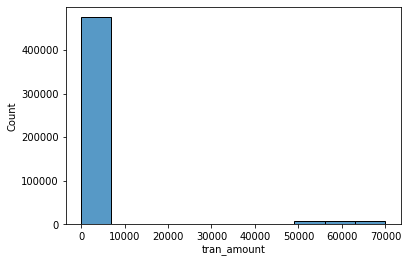

In [202]:
sns.histplot(df_trans_2.tran_amount,bins=10)

In [203]:
Q1, Q3 = df_trans_2['tran_amount'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower = Q1 - 2 * IQR
upper = Q3 + 2 * IQR

lower, upper

(-628.0, 1107.0)

In [204]:
df_trans_outliers = df_trans_2[df_trans_2.tran_amount>=upper]
df_trans_outliers

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [205]:
df_trans_normal = df_trans_2[df_trans_2.tran_amount<upper]
df_trans_normal

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499994,499995,679,2023-09-05,59,Ebay,Beauty & Personal Care,Gpay
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [206]:
tran_median_per_category = df_trans_normal.groupby("product_category")["tran_amount"].median()
tran_median_per_category

product_category
Beauty & Personal Care     92.0
Books                      30.0
Electronics               529.0
Fashion & Apparel          65.0
Garden & Outdoor          126.0
Home Decor                305.0
Kitchen Appliances        176.0
Sports                    269.0
Toys & Games               50.0
Name: tran_amount, dtype: float64

#### We will replace outliers transaction values with median value of product category 

In [207]:
df_trans_2.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [208]:
df_trans_2.loc[df_trans_outliers.index, 'tran_amount'] = df_trans_outliers['product_category'].map(tran_median_per_category)

In [209]:
df_trans_outliers = df_trans_2[df_trans_2.tran_amount>=upper]
df_trans_outliers

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


#### We can see the outliers values are being replaced

<AxesSubplot:xlabel='tran_amount', ylabel='Count'>

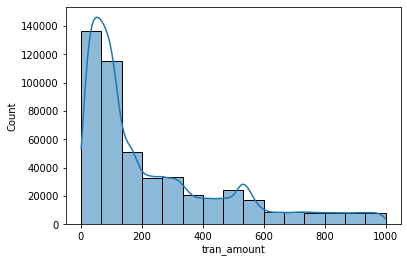

In [210]:
sns.histplot(x='tran_amount', data=df_trans_2, bins=15, kde=True)

#### distribution is right skewed

In [211]:
df_trans_2.head(3)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe


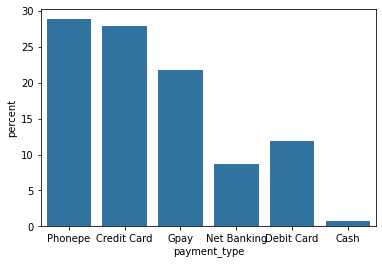

In [212]:
sns.countplot(x=df_trans_2.payment_type, stat='percent')
plt.show()

In [213]:
df_merged_2 = df_merged.merge(df_trans_2, on='cust_id', how='inner')
df_merged_2.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1283,2023-01-01,30,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1382,2023-01-01,96,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1521,2023-01-01,86,Meesho,Garden & Outdoor,Gpay


In [214]:
df_merged_2.shape

(500000, 22)

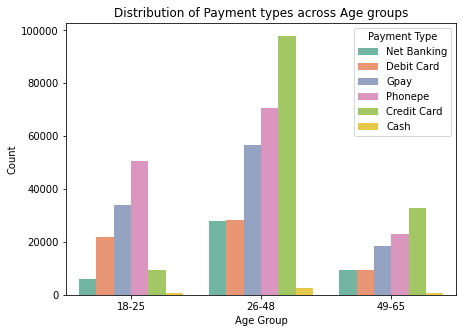

In [215]:
plt.figure(figsize=(7, 5))
sns.countplot(x='age_group', hue='payment_type', data=df_merged_2, palette='Set2')
plt.title('Distribution of Payment types across Age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Type', loc='upper right')

plt.show()

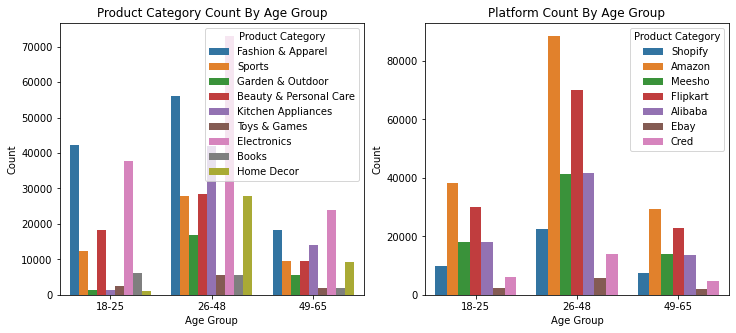

In [216]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='age_group', hue="product_category", data=df_merged_2, ax=ax1)
ax1.set_title("Product Category Count By Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")
ax1.legend(title="Product Category", loc='upper right')

sns.countplot(x='age_group', hue="platform", data=df_merged_2, ax=ax2)
ax2.set_title("Platform Count By Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Count")
ax2.legend(title="Product Category", loc='upper right')

plt.show()

### 

1. Top 3 purchasing categories of customers in age group (18 -25) : Electronics, Fashion & Apparel, Beauty & personal care
1. Top platforms : Amazon, Flipkart, Alibaba

### Average Transaction Amount

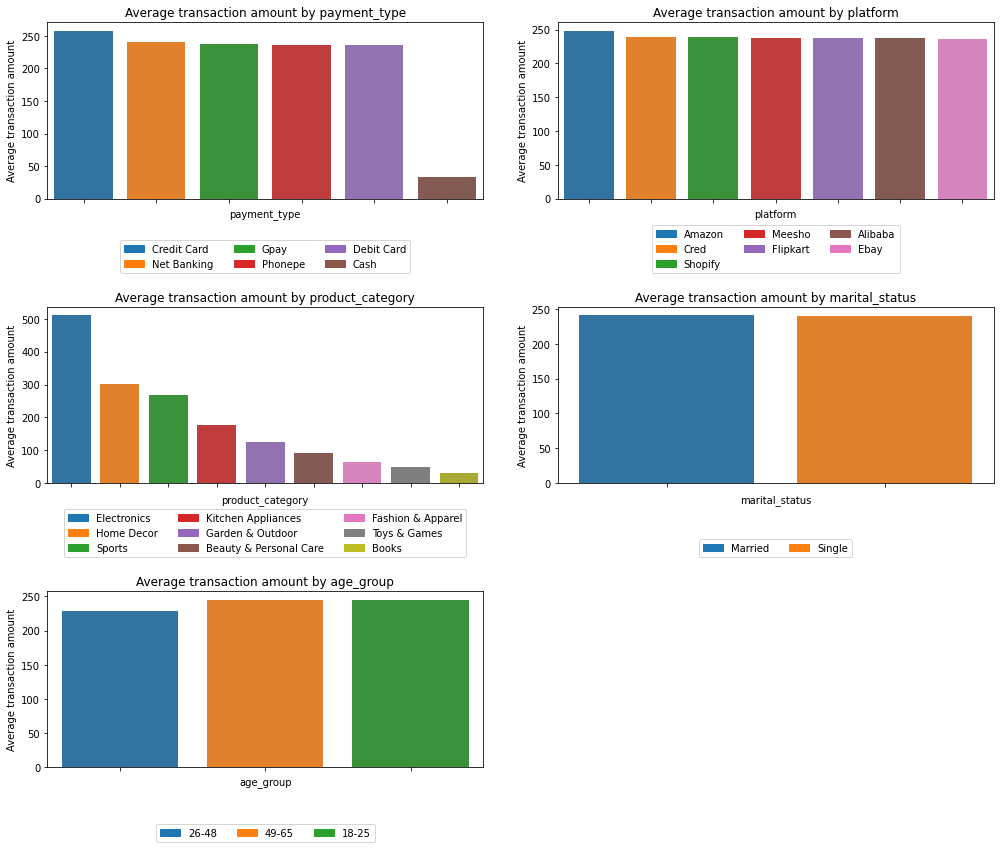

In [217]:

from matplotlib.patches import Patch

# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(14, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

for i, cat_col in enumerate(cat_cols):
    # Step 1: Calculate average transaction amount by category
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()

    # Step 2: Sort the data
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)

    # Step 3: Create a matching color palette
    palette = sns.color_palette('tab10', n_colors=len(sorted_data))

    # Step 4: Create the barplot
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette=palette)

    # Step 5: Set labels
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

    # Step 6: Create dynamic legend for each subplot
    legend_handles = [
        Patch(color=palette[j], label=str(sorted_data[cat_col].iloc[j]))
        for j in range(len(sorted_data))
    ]
    axes[i].legend(handles=legend_handles, title=None, loc='lower center', bbox_to_anchor=(0.5, -0.45), ncol=3)

# Step 7: Hide unused axes
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [218]:
age_group_metrics = df_merged_2.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,37138.181054,1137.024545,484.708344
1,26-48,146092.690672,20610.301607,597.918043
2,49-65,260430.658253,41781.734465,701.876810


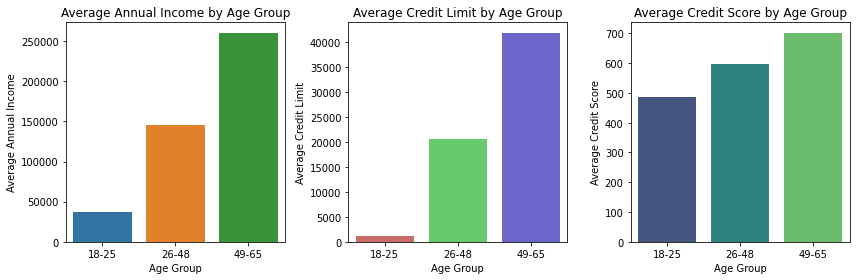

In [219]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Average annual income by age group
sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Average Max Credit Limit by Age Group
sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Average Credit Score by Age Group
sns.barplot(x='age_group', y='credit_score', data=age_group_metrics, palette='viridis', ax=ax3)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

1. People with age group of 18 -25 accounts to ~26% of customer base in the data
2. Avg annual income of this group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Top 3 most shopping products categories : Electronics, Fashion & Apparel, Beauty & Personal care

### We want to do a trial run for our new credit card. For this we need to figure out 
 --- How many customers do we need for our A/B testing. 
 Then we will form a control and test group.
 
 First we need to select our sample size.

In [229]:
# Importing the power analysis function from statsmodels
from statsmodels.stats.power import tt_ind_solve_power

alpha=0.05
power=0.8
ratio=1     # Equal sample size in control and test groups (n1 = n2)

effect_sizes = [0.1, 0.2, 0.3, 0.4, 0.5,0.8,1]  #  standard deviations greater than control group 

for effect_size in effect_sizes:
    sample_size = sms.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio, alternative='two-sided')
    print(f"Effect Size: {effect_size}, Required Sample Size: {int(sample_size)} customers")

Effect Size: 0.1, Required Sample Size: 1570 customers
Effect Size: 0.2, Required Sample Size: 393 customers
Effect Size: 0.3, Required Sample Size: 175 customers
Effect Size: 0.4, Required Sample Size: 99 customers
Effect Size: 0.5, Required Sample Size: 63 customers
Effect Size: 0.8, Required Sample Size: 25 customers
Effect Size: 1, Required Sample Size: 16 customers


#### Based on the budget team can spend Effect Size selected is 0.4

#### Campaign Results

In [221]:
df_campaign = pd.read_csv('avg_transactions_after_campaign.csv')
df_campaign.head(4)

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,259.83,277.32
1,2023-09-11,191.27,248.68
2,2023-09-12,212.41,286.61
3,2023-09-13,214.92,214.85


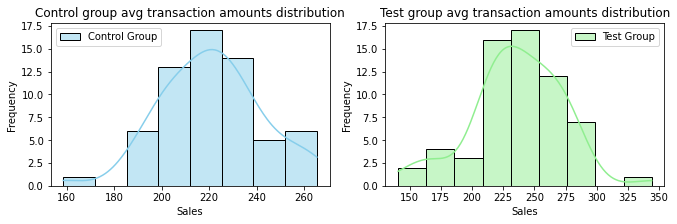

In [230]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))

# distribution of Campaign A Sales
sns.histplot(df_campaign['control_group_avg_tran'], kde=True, color='skyblue',label='Control Group', ax=ax1)
ax1.set_xlabel('Sales')
ax1.set_ylabel('Frequency')
ax1.set_title('Control group avg transaction amounts distribution')
ax1.legend()

# distribution of Campaign B Sales
sns.histplot(df_campaign['test_group_avg_tran'], kde=True, color='lightgreen',label='Test Group', ax=ax2)
ax2.set_xlabel('Sales')
ax2.set_ylabel('Frequency')
ax2.set_title('Test group avg transaction amounts distribution')
ax2.legend()

plt.show()

#### Perform Hypothesis Testing Using Two Sample Z-test

In [223]:
control_mean = df_campaign["control_group_avg_tran"].mean()
control_std = df_campaign["control_group_avg_tran"].std()
control_mean, control_std



(221.1751612903226, 21.35919211202701)

In [224]:
test_mean = df_campaign["test_group_avg_tran"].mean()
test_std = df_campaign["test_group_avg_tran"].std()
test_mean, test_std

(235.9835483870968, 36.658082109186374)

In [225]:
sample_size = df_campaign.shape[0]
sample_size

62

#### Calculating our Z-Score and p-value

In [226]:
control_var = (control_std**2/sample_size)
test_var = (test_std**2/sample_size)

Z_score = (test_mean-control_mean)/np.sqrt(control_var+test_var)
Z_score

2.748297374569113

In [227]:
p_value = 1 - st.norm.cdf(Z_score)
p_value

0.0029952824622024865

In [228]:
p_value< alpha  ## Statistically significant

True

#### Since our p-value is less than 5% we can reject our Null Hypothesis